In [191]:
import pandas as pd

In [192]:
try:
    product_data = pd.read_csv("/content/product.csv", error_bad_lines=False)
except pd.errors.ParserError as e:
    # If there is a ParserError, try to detect the delimiter
    with open("/content/product.csv", 'r', encoding='utf-8') as file:
        sample = file.read(1024)
        sniffer = csv.Sniffer()
        dialect = sniffer.sniff(sample)
        delimiter = dialect.delimiter

    product_data = pd.read_csv("/content/product.csv", delimiter=delimiter)

column_names = [
    'prod_id', 'prod_desc', 'prod_section', 'prod_category',
    'prod_subcategory', 'prod_type', 'prod_mfc_brand_cd',
    'prod_unit_qty_count', 'prod_count_uom', 'prod_uom_value'
]
product_data.columns = column_names

<ipython-input-192-4aff242a69ad>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  product_data = pd.read_csv("/content/product.csv", error_bad_lines=False)
Skipping line 989: expected 10 fields, saw 11
Skipping line 1696: expected 10 fields, saw 11
Skipping line 2559: expected 10 fields, saw 11
Skipping line 2896: expected 10 fields, saw 11
Skipping line 3764: expected 10 fields, saw 12
Skipping line 4568: expected 10 fields, saw 11
Skipping line 6551: expected 10 fields, saw 11
Skipping line 7013: expected 10 fields, saw 11
Skipping line 8113: expected 10 fields, saw 11
Skipping line 8183: expected 10 fields, saw 11
Skipping line 8241: expected 10 fields, saw 11
Skipping line 8314: expected 10 fields, saw 11
Skipping line 8791: expected 10 fields, saw 11
Skipping line 8882: expected 10 fields, saw 11
Skipping line 10932: expected 10 fields, saw 11
Skipping line 11372: expected 10 fields, saw

In [193]:
product_data.head()

,prod_id,prod_desc,prod_section,prod_category,prod_subcategory,prod_type,prod_mfc_brand_cd,prod_unit_qty_count,prod_count_uom,prod_uom_value
0,20000005,ACSE APPLE CIDER 3 LT,Produce,Hard Goods,Dressing/Dips/Juices,Juice,ACSE,1,L,3.0
1,20000069,ACSE WHOLE COD,Seafood,Fresh Seafood,Fresh Fish,Cod,ACSE,1,KG,1.0
2,20000086,S.S. SR. JUICE BERRIES,Bulk,Bulk Foods,Confectionary,Candy,SANB,1,UN,1.0
3,20000093,DANONE ACTIVIA CLUB PACK,Dairy,Yogurt/Refrigerated Juice,Yogurt,Health,DACT,24,G,100.0
4,20000100,DION CHILIES MEXICAN GROUND,Grocery,Baking,Baking-Spices,Core Spice,DION,1,G,39.0


In [194]:
category_keywords = {
    'Bath & Beauty': ['bath', 'soap', 'lotion', 'cosmetics', 'cream', 'fragrance'],
    'Gas Bar': ['fuel', 'gasoline', 'petrol', 'oil', 'octane', 'diesel'],
    'Skincare': ['moisturizer', 'cleanser', 'serum', 'skincare', 'acne', 'wrinkle'],
    'Cosmetic Treatments': ['treatment', 'facial', 'exfoliate', 'peel', 'mask', 'rejuvenation'],
    'Sports': ['sport', 'ball', 'bat', 'cleats', 'gloves', 'helmet'],
    'Pet Food & Supplies': ['pet', 'dog', 'cat', 'kibble', 'collar', 'aquarium'],
    'Jewellery & Accessories': ['necklace', 'ring', 'bracelet', 'earrings', 'watch', 'pendant'],
    '3rd Party Gift Cards': ['gift card', 'voucher', 'coupon', 'prepaid', 'redeemable'],
    'Baking': ['flour', 'sugar', 'baking', 'oven', 'yeast', 'cake', 'cookie'],
    'Sweet': ['chocolate', 'candy', 'sugar', 'sweet', 'honey', 'syrup'],
    'Hot Beverages & Accessories': ['coffee', 'tea', 'espresso', 'mug', 'kettle', 'brew'],
    'Fresh Service Case': ['deli', 'meat', 'cheese', 'seafood', 'salad', 'fresh'],
    'Portraits': ['portrait', 'photography', 'photo', 'frame', 'canvas', 'picture'],
    'Lottery - Electronic': ['lottery', 'ticket', 'jackpot', 'prize', 'scratch', 'win'],
    'Rx BTC': ['prescription', 'pharmacy', 'medicine', 'drug', 'tablet', 'pharmaceutical'],
    'Confectionary - Seasonal': ['candy', 'chocolate', 'seasonal', 'gift', 'sweets', 'holiday'],
    'Cosmetic Accessories': ['brush', 'makeup', 'sponge', 'cosmetic', 'applicator', 'beauty'],
    'Colour Cosmetics - Mass': ['lipstick', 'foundation', 'eyeshadow', 'blush', 'mascara', 'makeup', 'ess'],
    'Deli Cheese': ['cheese', 'gouda', 'cheddar', 'brie', 'deli', 'provolone'],
    'Stationery': ['pen', 'paper', 'notebook', 'envelope', 'pencil', 'stationery'],
    'Coupons': ['coupon', 'discount', 'voucher', 'deal', 'promo', 'savings'],
    'Medicinal Products': ['medicine', 'remedy', 'healing', 'treatment', 'pharmaceutical', 'herbal'],
    'Spirits': ['vodka', 'whiskey', 'rum', 'gin', 'tequila', 'liquor'],
    'Salad Fixings': ['lettuce', 'tomato', 'cucumber', 'salad', 'dressing', 'greens'],
    'Confectionary': ['candy', 'chocolate', 'sweets', 'gum', 'lollipop', 'toffee'],
    'Milk & Eggs': ['milk', 'eggs', 'dairy', 'cream', 'butter', 'yogurt'],
    'Fresh-Lamb/Veal/Sausage': ['lamb', 'veal', 'sausage', 'meat', 'fresh', 'butcher'],
    'Snacks': ['chips', 'popcorn', 'pretzel', 'snack', 'crisps', 'nuts'],
    'Toys': ['toy', 'game', 'puzzle', 'doll', 'lego', 'action figure'],
    'Jewellery & Fashion': ['necklace', 'bracelet', 'fashion', 'accessory', 'ring', 'earrings'],
    'Soft Goods (Textiles)': ['linen', 'towel', 'curtain', 'textile', 'fabric', 'bedding'],
    'Gourmet Foods': ['gourmet', 'delicacy', 'luxury', 'truffle', 'caviar', 'artisanal'],
    'Hardware/Automotive': ['tool', 'hardware', 'automotive', 'screwdriver', 'car', 'wrench'],
    'Rx': ['prescription', 'medicine', 'drug', 'pharmacy', 'pharmaceutical', 'tablet'],
    'Bulk Foods': ['bulk', 'grain', 'rice', 'nuts', 'seeds', 'flour'],
    'Movies': ['movie', 'film', 'dvd', 'blu-ray', 'cinema', 'video'],
    'Phones and Accessories': ['phone', 'smartphone', 'charger', 'case', 'headphones', 'accessory'],
    'Feminine Hygiene': ['tampon', 'pad', 'menstrual', 'hygiene', 'sanitary', 'feminine'],
    'Beer': ['beer', 'ale', 'lager', 'brew', 'pilsner', 'stout'],
    'Cold Beverages': ['soda', 'juice', 'water', 'beverage', 'cold drink', 'ice tea'],
    'In-Store': ['retail', 'in-store', 'shopping', 'product', 'shelf', 'display'],
    'Canned': ['canned', 'preserved', 'tinned', 'jarred', 'pickle', 'conserved'],
    'Salad Bar': ['salad', 'coleslaw', 'greens', 'dressings', 'veggies', 'deli'],
    'Outdoor Living': ['patio', 'grill', 'outdoor', 'furniture', 'fire pit', 'garden'],
    'Meal Makers': ['instant', 'ready-to-cook', 'prepped meal', 'kit', 'pasta sauce'],
    'Supplies': ['supply', 'material', 'equipment', 'utility', 'provisions', 'tools'],
    'Commercial': ['commercial', 'industrial', 'heavy-duty', 'bulk', 'business', 'wholesale'],
    'Condiments': ['sauce', 'ketchup', 'mustard', 'mayonnaise', 'seasoning', 'dressing'],
    'Electronics': ['electronics', 'device', 'gadget', 'appliance', 'tech', 'charger'],
    'Cheese/Butter/Margarine': ['cheese', 'butter', 'margarine', 'spread', 'dairy'],
    'Haircare': ['shampoo', 'conditioner', 'hair', 'styling', 'gel', 'dye'],
    'Household': ['cleaner', 'detergent', 'household', 'disinfectant', 'paper towels'],
    'Seasonal': ['holiday', 'seasonal', 'Christmas', 'Easter', 'Halloween', 'decoration'],
    'HMR': ['ready-to-eat', 'deli', 'takeaway', 'hot meals', 'pre-cooked', 'rotisserie'],
    'Wine': ['wine', 'merlot', 'chardonnay', 'cabernet', 'rosé', 'vintage'],
    'Frozen Boxed Meat': ['frozen', 'meat', 'beef', 'chicken', 'pork', 'seafood'],
    'Tobacco': ['cigarettes', 'tobacco', 'cigars', 'smoking', 'nicotine', 'vape'],
    'Digital Hardlines': ['electronics', 'hardware', 'computer', 'laptop', 'camera'],
    'Cosmetic Fragrances': ['perfume', 'cologne', 'scent', 'fragrance', 'spray'],
    'Cards And Wrap': ['greeting card', 'wrapping', 'gift bag', 'ribbon', 'envelope'],
    'Vegetables': ['vegetable', 'greens', 'salad', 'organic', 'fresh', 'produce'],
    'Floral': ['flowers', 'bouquet', 'roses', 'floral', 'plant', 'vase'],
    'Yogurt/Refrigerated Juice': ['yogurt', 'juice', 'dairy', 'smoothie', 'kefir'],
    'Kitchen Prep': ['cookware', 'utensil', 'knife', 'pan', 'cutting board'],
    'Reading': ['book', 'magazine', 'novel', 'reading', 'kindle', 'literature'],
    'Fresh Seafood': ['seafood', 'fish', 'shrimp', 'lobster', 'crab', 'oyster'],
    'Phone Cards': ['phone card', 'prepaid', 'top-up', 'calling card', 'credit'],
    'Gaming': ['game', 'console', 'video game', 'controller', 'playstation', 'xbox'],
    'Natural Foods': ['organic', 'natural', 'gluten-free', 'non-GMO', 'health'],
    'Oralcare': ['toothpaste', 'toothbrush', 'dental floss', 'mouthwash', 'oral'],
    'Nail': ['nail polish', 'manicure', 'pedicure', 'nail care', 'nail file'],
    'Hard Goods': ['tool', 'appliance', 'hardware', 'equipment', 'machinery'],
    'Dollar Shop': ['discount', 'cheap', 'bargain', 'deal', 'dollar'],
    'Deli Meat': ['ham', 'turkey', 'salami', 'prosciutto', 'deli', 'meat'],
    'Fruit': ['apple', 'banana', 'orange', 'berry', 'fruit', 'fresh'],
    'Fresh Beef': ['steak', 'beef', 'roast', 'ribeye', 'ground beef'],
    'Community Room / Cooking School': ['community', 'cooking', 'class', 'workshop', 'event'],
    'Lottery - Scratch': ['scratch', 'lottery', 'ticket', 'prize', 'win', 'instant'],
    'Household Cleaning Needs': ['cleaner', 'detergent', 'sponge', 'disinfectant', 'soap'],
    'Photo Image': ['photo', 'print', 'picture', 'image', 'frame', 'album'],
    'Restaurant Disposable': ['takeout', 'container', 'disposable', 'utensil', 'packaging'],
    'Dispensing': ['pharmacy', 'prescription', 'medicine', 'dispense', 'pharmaceutical'],
    'Processed': ['processed', 'packaged', 'canned', 'prepared', 'ready-to-eat'],
    'Garden': ['plant', 'flower', 'garden', 'soil', 'fertilizer', 'pot'],
    'Fresh-Pork': ['pork', 'ham', 'bacon', 'sausage', 'rib', 'fresh'],
    'Frozen Seafood': ['fish', 'shrimp', 'seafood', 'frozen', 'filet', 'crab'],
    'Grooming': ['razor', 'shaving', 'grooming', 'trimmer', 'aftershave'],
    'Fresh-Poultry': ['chicken', 'turkey', 'poultry', 'fresh', 'breast', 'wing'],
    'Breakfast': ['cereal', 'pancake', 'egg', 'bacon', 'breakfast', 'oatmeal'],
    'Home Decor': ['furniture', 'decoration', 'cushion', 'vase', 'lamp', 'rug'],
    'Savory': ['snack', 'chips', 'crackers', 'savory', 'dip', 'nuts'],
    'Optical': ['glasses', 'sunglasses', 'lenses', 'optical', 'eyewear'],
    'Household Paper Products': ['towel', 'toilet paper', 'napkin', 'tissue', 'paper towel'],
    'Wellness': ['supplement', 'vitamin', 'yoga', 'wellness', 'health'],
    'Baby': ['diaper', 'formula', 'baby food', 'stroller', 'crib', 'onesie']
}

In [195]:
import pandas as pd

def check_for_mismatches(product_data, category_keywords):
    mismatched_products = []  # List to hold the results

    for index, row in product_data.iterrows():
        prod_id = row['prod_id']
        description = row['prod_desc'].lower()  # Convert to lowercase for case-insensitive matching
        category = row['prod_category']

        # Check for expected keywords
        expected_keywords = category_keywords.get(category, [])
        has_expected = any(keyword.lower() in description for keyword in expected_keywords)

        # Check for unexpected keywords
        unexpected_keywords = [kw for cat, kws in category_keywords.items() if cat != category for kw in kws]
        has_unexpected = any(keyword.lower() in description for keyword in unexpected_keywords)

        # Append product details to the list for review if mismatches found
        if not has_expected or has_unexpected:
            mismatched_products.append({
                'Product ID': prod_id,
                'Description': row['prod_desc'],  # Original case
                'Category': category
            })

    # Convert the list of dictionaries to a pandas DataFrame for tabular output
    results_df = pd.DataFrame(mismatched_products)
    return results_df

In [196]:
def check_for_mismatches_v2(product_data, category_keywords):
    mismatched_products = []  # List to hold the results

    for index, row in product_data.iterrows():
        prod_id = row['prod_id']
        description = row['prod_desc'].lower()  # Convert to lowercase for case-insensitive matching
        category = row['prod_category']

        # Retrieve the specific and highly relevant keywords for the given category
        specific_keywords = category_keywords.get(category, [])

        # Check for the presence of specific keywords in the description
        # This checks for whole words only to reduce false positives
        keyword_found = any(f" {keyword} " in f" {description} " for keyword in specific_keywords)

        # If no specific keywords are found in the description, flag as a potential mismatch
        if not keyword_found:
            mismatched_products.append({
                'Product ID': prod_id,
                'Description': row['prod_desc'],  # Original case
                'Category': category
            })

    # Convert the list of dictionaries to a pandas DataFrame for tabular output
    results_df = pd.DataFrame(mismatched_products)
    return results_df

mismatched_products_df = check_for_mismatches_v2(product_data, category_keywords)
display(mismatched_products_df)

,Product ID,Description,Category
0,20000005,ACSE APPLE CIDER 3 LT,Hard Goods
1,20000069,ACSE WHOLE COD,Fresh Seafood
2,20000086,S.S. SR. JUICE BERRIES,Bulk Foods
3,20000093,DANONE ACTIVIA CLUB PACK,Yogurt/Refrigerated Juice
4,20000100,DION CHILIES MEXICAN GROUND,Baking
...,...,...,...
127300,21363091002,WNW CI SHDW QUAD PETALETTE,Colour Cosmetics - Mass
127301,21364200002,WNW PHOTO FOCUS FDN BEIGE,Colour Cosmetics - Mass
127302,21364200003,WNW PHOTO FOCUS FDN SOFT IVORY,Colour Cosmetics - Mass
127303,21364220001,WNW ULT BROW RETRACT TAUPE,Colour Cosmetics - Mass


In [197]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'\W', ' ', text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    text = ' '.join([word for word in words if word not in stop_words])
    return text

product_data['cleaned_desc'] = product_data['prod_desc'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [198]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=500)  # Adjust max_features as needed

# Example for a single category
example_category = 'Hard Goods'
category_data = product_data[product_data['prod_category'] == example_category]['cleaned_desc']
tfidf_matrix = vectorizer.fit_transform(category_data)

# Get feature names (keywords) for this category
feature_names = vectorizer.get_feature_names_out()

print(f"Top keywords for {example_category}: {feature_names}")

Top keywords for Hard Goods: ['100' '100g' '155g' '170g' '178g' '18' '1kg' '1l' '1lb' '200g' '200gr'
 '213g' '225g' '227g' '236ml' '24' '250g' '250gr' '280g' '283g' '296ml'
 '2kg' '2l' '2lb' '300' '300ml' '325ml' '340g' '340ml' '350ml' '354ml'
 '355ml' '36' '375ml' '384ml' '396g' '3lt' '400g' '414ml' '450ml' '454'
 '454g' '454gr' '473' '473ml' '4x56g' '4x60ml' '54l' '567g' '591ml' '59ml'
 '60ml' '620g' '680g' '68l' '6x48g' '700g' '700ml' '730ml' '750ml' '78l'
 '7d' '800g' '828' '828ml' '89lt' '900ml' '907g' '946ml' '947ml' '950ml'
 'achiever' 'acse' 'al' 'alm' 'almndmlk' 'almond' 'almondmilk' 'almonds'
 'amira' 'amzng' 'aple' 'apple' 'apricot' 'apricots' 'artchk' 'asiago'
 'aurora' 'avo' 'avocado' 'balsamic' 'ban' 'bana' 'banaberry' 'banana'
 'bang' 'bartlett' 'basil' 'bbb' 'beach' 'beer' 'beet' 'beets' 'berry'
 'better' 'bh' 'big' 'bird' 'black' 'blk' 'blood' 'blue' 'blueberry'
 'bluebery' 'bluebry' 'bm' 'bnn' 'bolts' 'boost' 'bounty' 'bowl' 'branch'
 'breeze' 'bry' 'bstrong' 'bt473ml

In [199]:
for category in product_data['prod_category'].unique():
    category_data = product_data[product_data['prod_category'] == category]['cleaned_desc']
    if category_data.empty:
        continue

    # Applying TF-IDF vectorizer to the cleaned descriptions of the current category
    tfidf_matrix = vectorizer.fit_transform(category_data)
    feature_names = vectorizer.get_feature_names_out()

    # Update the existing keywords for the category with new ones from TF-IDF
    # This combines the original manually selected keywords with the new TF-IDF keywords
    if category in category_keywords:
        # Merge avoiding duplicates
        category_keywords[category] = list(set(category_keywords[category] + list(feature_names)))
    else:
        # If the category wasn't in the original dictionary, add it
        category_keywords[category] = list(feature_names)

In [200]:
mismatched_products_df = check_for_mismatches_v2(product_data, category_keywords)

In [201]:
mismatched_products_df_filtered = mismatched_products_df[
    (mismatched_products_df['Category'] != 'Reading') &
    (mismatched_products_df['Category'] != 'Colour Cosmetics - Mass')
]
mismatched_products_df_filtered

,Product ID,Description,Category
0,20000151,NUTRIPUR GENIUS 90 CAPSULES,Natural Foods
2,20000408,TURIN BAILEY'S FILLED CHOCOLAT,Confectionary - Seasonal
3,20000467,FOG BUSTER 10CT,Optical
5,20001453,DIMPFLMEIER PFEFFERNUSSE,In-Store
6,20002182,DESITIN MAX STRENGTH,Baby
...,...,...,...
5776,20964009001,ARBI,Vegetables
5777,20965108002,BRK CRNBRY/BBRY FRT&NUT,Natural Foods
5778,20982570001,"YRKSHR OR GR A EGGS LRG, EA",Natural Foods
5793,21182184003,KNR SHICHIMI TOGARASHI SSN,Baking


## Optimization

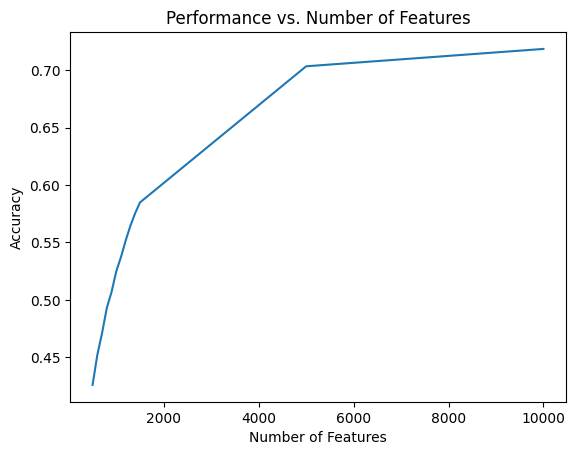

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np

X = product_data['prod_desc']  # Features: Product descriptions
y = product_data['prod_category']  # Labels: Product categories

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Range of max_features values to test
max_features_options = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 5000, 10000]
performance = []

for max_features in max_features_options:
    vectorizer = TfidfVectorizer(max_features=max_features)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_val_tfidf = vectorizer.transform(X_val)

    # Example classifier
    clf = MultinomialNB()
    clf.fit(X_train_tfidf, y_train)
    predictions = clf.predict(X_val_tfidf)

    acc = accuracy_score(y_val, predictions)
    performance.append(acc)

# Plotting the performance
import matplotlib.pyplot as plt

plt.plot(max_features_options, performance)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Performance vs. Number of Features')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

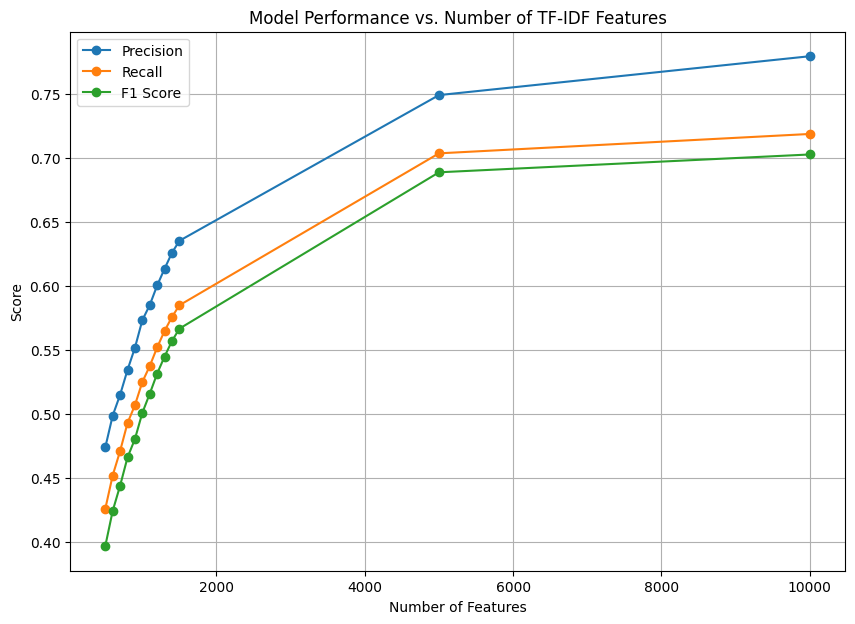

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Define your feature space
max_features_options = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 5000, 10000]

# To store the results
results = []

for max_features in max_features_options:
    # Create a new vectorizer with the current number of max_features
    vectorizer = TfidfVectorizer(max_features=max_features)
    clf = MultinomialNB()
    model = make_pipeline(vectorizer, clf)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_val)

    # Calculate metrics
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    # Store the results
    results.append((max_features, precision, recall, f1))

# Unpack the results for plotting
max_features_used, precisions, recalls, f1_scores = zip(*results)

# Plotting
plt.figure(figsize=(10, 7))
plt.plot(max_features_used, precisions, label='Precision', marker='o')
plt.plot(max_features_used, recalls, label='Recall', marker='o')
plt.plot(max_features_used, f1_scores, label='F1 Score', marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.title('Model Performance vs. Number of TF-IDF Features')
plt.legend()
plt.grid(True)
plt.show()

In [204]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Example for a single category
example_category = 'Hard Goods'
category_data = product_data[product_data['prod_category'] == example_category]['cleaned_desc']
tfidf_matrix = vectorizer.fit_transform(category_data)

# Get feature names (keywords) for this category
feature_names = vectorizer.get_feature_names_out()

print(f"Top keywords for {example_category}: {feature_names}")

Top keywords for Hard Goods: ['100' '100g' '155g' '170g' '178g' '18' '1kg' '1l' '1lb' '200g' '200gr'
 '213g' '225g' '227g' '236ml' '24' '250g' '250gr' '280g' '283g' '296ml'
 '2kg' '2l' '2lb' '300' '300ml' '325ml' '340g' '340ml' '350ml' '354ml'
 '355ml' '36' '375ml' '384ml' '396g' '3lt' '400g' '414ml' '450ml' '454'
 '454g' '454gr' '473' '473ml' '4x56g' '4x60ml' '54l' '567g' '591ml' '59ml'
 '60ml' '620g' '680g' '68l' '6x48g' '700g' '700ml' '730ml' '750ml' '78l'
 '7d' '800g' '828' '828ml' '89lt' '900ml' '907g' '946ml' '947ml' '950ml'
 'achiever' 'acse' 'al' 'alm' 'almndmlk' 'almond' 'almondmilk' 'almonds'
 'amira' 'amzng' 'aple' 'apple' 'apricot' 'apricots' 'artchk' 'asiago'
 'aurora' 'avo' 'avocado' 'balsamic' 'ban' 'bana' 'banaberry' 'banana'
 'bang' 'bartlett' 'basil' 'bbb' 'beach' 'beer' 'beet' 'beets' 'berry'
 'better' 'bh' 'big' 'bird' 'black' 'blk' 'blood' 'blue' 'blueberry'
 'bluebery' 'bluebry' 'bm' 'bnn' 'bolts' 'boost' 'bounty' 'bowl' 'branch'
 'breeze' 'bry' 'bstrong' 'bt473ml

In [205]:
for category in product_data['prod_category'].unique():
    category_data = product_data[product_data['prod_category'] == category]['cleaned_desc']
    if category_data.empty:
        continue

    # Applying TF-IDF vectorizer to the cleaned descriptions of the current category
    tfidf_matrix = vectorizer.fit_transform(category_data)
    feature_names = vectorizer.get_feature_names_out()

    # Update the existing keywords for the category with new ones from TF-IDF
    # This combines the original manually selected keywords with the new TF-IDF keywords
    if category in category_keywords:
        # Merge avoiding duplicates
        category_keywords[category] = list(set(category_keywords[category] + list(feature_names)))
    else:
        # If the category wasn't in the original dictionary, add it
        category_keywords[category] = list(feature_names)

In [206]:
mismatched_products_df = check_for_mismatches_v2(product_data, category_keywords)

In [207]:
mismatched_products_df_filtered = mismatched_products_df[
    (mismatched_products_df['Category'] != 'Reading') &
    (mismatched_products_df['Category'] != 'Colour Cosmetics - Mass')
]
mismatched_products_df_filtered

,Product ID,Description,Category
0,20005051,ST-ALBERT MOZZ.PART.SKIM,Deli Cheese
4,20017627,"10'X30'"" BANNER""",Photo Image
5,20017733,"8'X24'"" BANNER""",Photo Image
6,20018002,ST-AUBIN,Deli Cheese
7,20018648,S&B CHOC-O-MACS,Bulk Foods
...,...,...,...
454,20313741002,COCA-COLA,Cold Beverages
455,20316026002,COCA-COLA,Cold Beverages
456,20337420002,CHING-INSTANT NOODLES-SCWN,Canned
457,20931457001,ENER-C TANGERINE-GRAPEFRUIT,Natural Foods


In [172]:
# Get the list of Product IDs considered as mismatches
mismatched_ids = mismatched_products_df_filtered['Product ID'].tolist()

# Update the 'prod_category' to 'Mismatch' for all records with a Product ID in mismatched_ids
product_data.loc[product_data['prod_id'].isin(mismatched_ids), 'prod_category'] = 'Mismatch'

mismatched_records = product_data[product_data['prod_category'] == 'Mismatch']
print(mismatched_records)

In [173]:
# Save the updated DataFrame to a CSV file
updated_csv_file_name = 'updated_product_data.csv'
product_data.to_csv(updated_csv_file_name, index=False)

In [174]:
# Use Colab's file download utility
from google.colab import files
files.download(updated_csv_file_name)